# Plotting EZ and EX values

In [1]:
from tkinter import filedialog
from os import getcwd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_read = r'Output\LogData_EZEX-List.csv'

df = pd.read_csv(filepath_or_buffer=file_path_read)
del df["Unnamed: 6"]
df["DATE TIME"] = pd.to_datetime(df["DATE"] + ' ' + df["TIME"])
df.head()

,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
0,16JAN25,16:49:07.9,Track 2,8,91,NaN,2025-01-16 16:49:07.900
1,20JAN25,15:53:41.8,Track 2,93,90,73.0,2025-01-20 15:53:41.800
2,20JAN25,15:53:43.4,Track 2,90,90,69.0,2025-01-20 15:53:43.400
3,20JAN25,15:53:45.0,Track 2,86,90,96.0,2025-01-20 15:53:45.000
4,20JAN25,15:53:46.2,Track 2,82,90,75.0,2025-01-20 15:53:46.200


In [3]:
# get list of unique dates
dates_list = df["DATE"].unique()
dates_list

array(['16JAN25', '20JAN25'], dtype=object)

## Case 1

In [9]:
df_data = df.copy()

In [10]:
df_data = df[df["DATE"] == dates_list[1]]
df_data

,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
1,20JAN25,15:53:41.8,Track 2,93,90,73.0,2025-01-20 15:53:41.800
2,20JAN25,15:53:43.4,Track 2,90,90,69.0,2025-01-20 15:53:43.400
3,20JAN25,15:53:45.0,Track 2,86,90,96.0,2025-01-20 15:53:45.000
4,20JAN25,15:53:46.2,Track 2,82,90,75.0,2025-01-20 15:53:46.200
5,20JAN25,15:53:47.8,Track 2,79,90,75.0,2025-01-20 15:53:47.800
...,...,...,...,...,...,...,...
95,20JAN25,17:47:45.7,Track 2,12,90,20.0,2025-01-20 17:47:45.700
96,20JAN25,17:47:58.4,Track 2,33,90,5.0,2025-01-20 17:47:58.400
97,20JAN25,17:47:58.8,Track 2,54,90,61.0,2025-01-20 17:47:58.800
98,20JAN25,17:47:59.2,Track 2,75,90,NaN,2025-01-20 17:47:59.200


In [11]:
df_data = df_data.reset_index()
df_data

,index,DATE,TIME,TRACK NUM,EZ,EX,SPEED (mph),DATE TIME
0,1,20JAN25,15:53:41.8,Track 2,93,90,73.0,2025-01-20 15:53:41.800
1,2,20JAN25,15:53:43.4,Track 2,90,90,69.0,2025-01-20 15:53:43.400
2,3,20JAN25,15:53:45.0,Track 2,86,90,96.0,2025-01-20 15:53:45.000
3,4,20JAN25,15:53:46.2,Track 2,82,90,75.0,2025-01-20 15:53:46.200
4,5,20JAN25,15:53:47.8,Track 2,79,90,75.0,2025-01-20 15:53:47.800
...,...,...,...,...,...,...,...,...
94,95,20JAN25,17:47:45.7,Track 2,12,90,20.0,2025-01-20 17:47:45.700
95,96,20JAN25,17:47:58.4,Track 2,33,90,5.0,2025-01-20 17:47:58.400
96,97,20JAN25,17:47:58.8,Track 2,54,90,61.0,2025-01-20 17:47:58.800
97,98,20JAN25,17:47:59.2,Track 2,75,90,NaN,2025-01-20 17:47:59.200


### Plotting

In [12]:
def plotApproachGraph(df_plot: pd.DataFrame, exclude_Speed: bool=False):
    sns.set_theme(style="ticks")
    colors = sns.color_palette(palette='viridis', n_colors=2)

    fig, ax1 = plt.subplots(figsize=(20, 6))
    ax1.grid(True)

    sns.lineplot(
        data=df_plot,
        x="DATE TIME",
        y="EZ",
        color=colors[0],
        # palette="flare",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        marker="o",
        label="EZ value",
        ax=ax1,
        legend=False,
    )

    if (exclude_Speed == False):
        ax2 = ax1.twinx()
        sns.lineplot(
            data=df_plot,
            x="DATE TIME",
            y="SPEED (mph)",
            color=colors[1],
            alpha=0.35,
            # palette="viridis",
            # hue="TRACK NUM",
            # style="TRACK NUM",
            marker="o",
            linestyle='--',
            label="Speed",
            ax=ax2,
            legend=False,
        )

        # Fix the legend (since we're using two axes)
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
    
    else:
        lines1, labels1 = ax1.get_legend_handles_labels()
        ax1.legend(lines1, labels1, loc='lower left')

    # plt.legend()
    plt.title("Approach Graph", fontsize=22)
    plt.show()


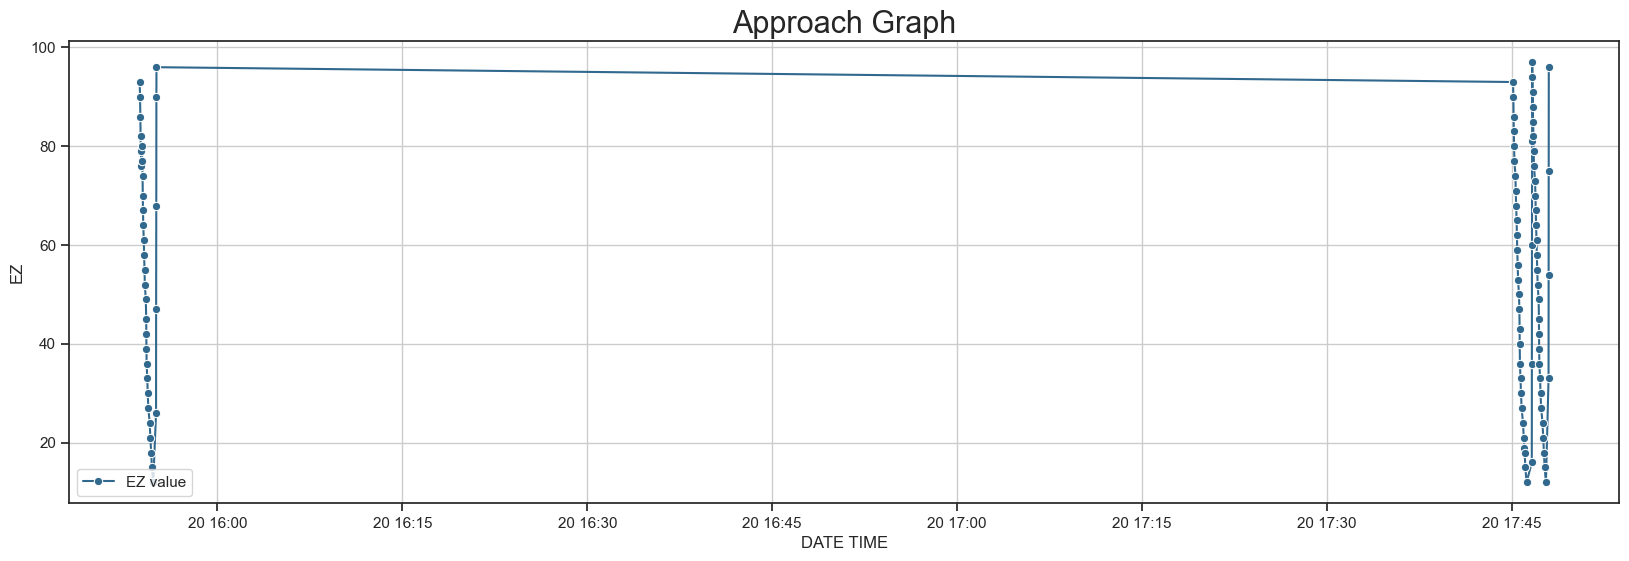

In [13]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 2"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]

plotApproachGraph(df_plot, exclude_Speed=True)

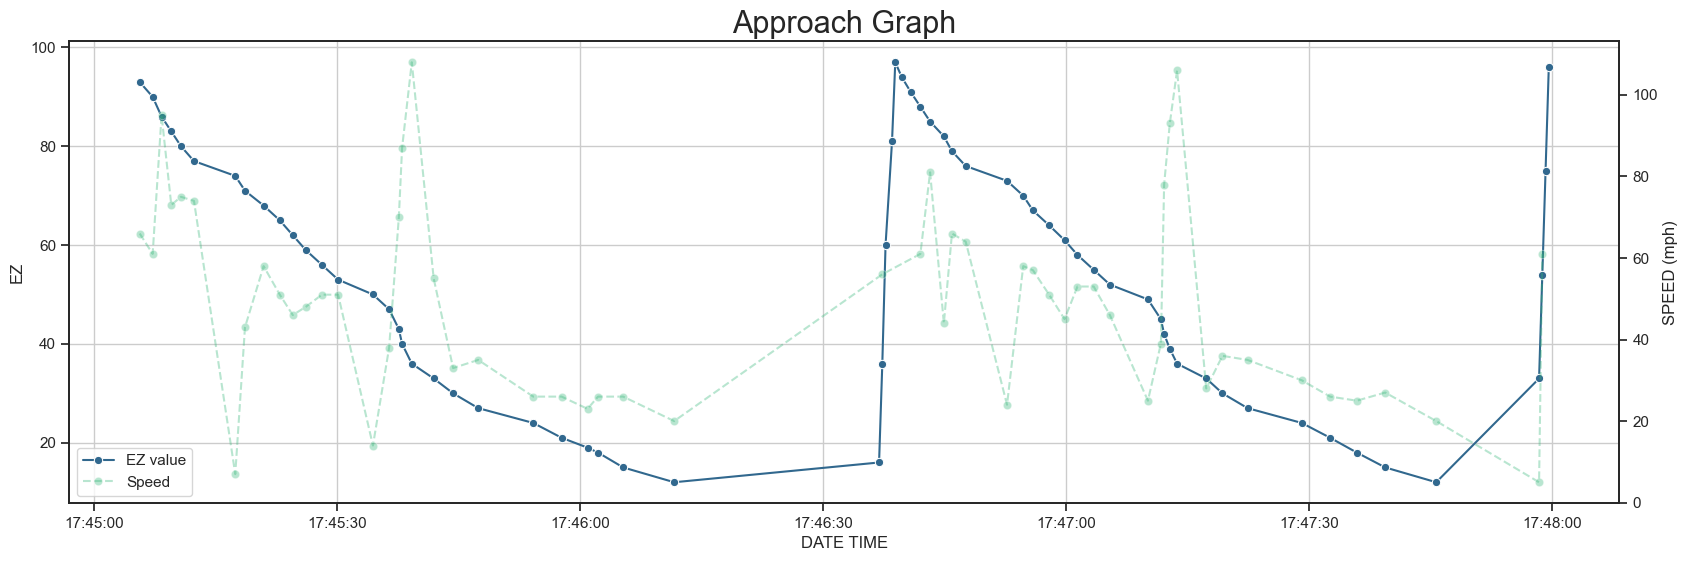

In [17]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 2"]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2025-01-20 17:30:0")]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:25:0")]

plotApproachGraph(df_plot)


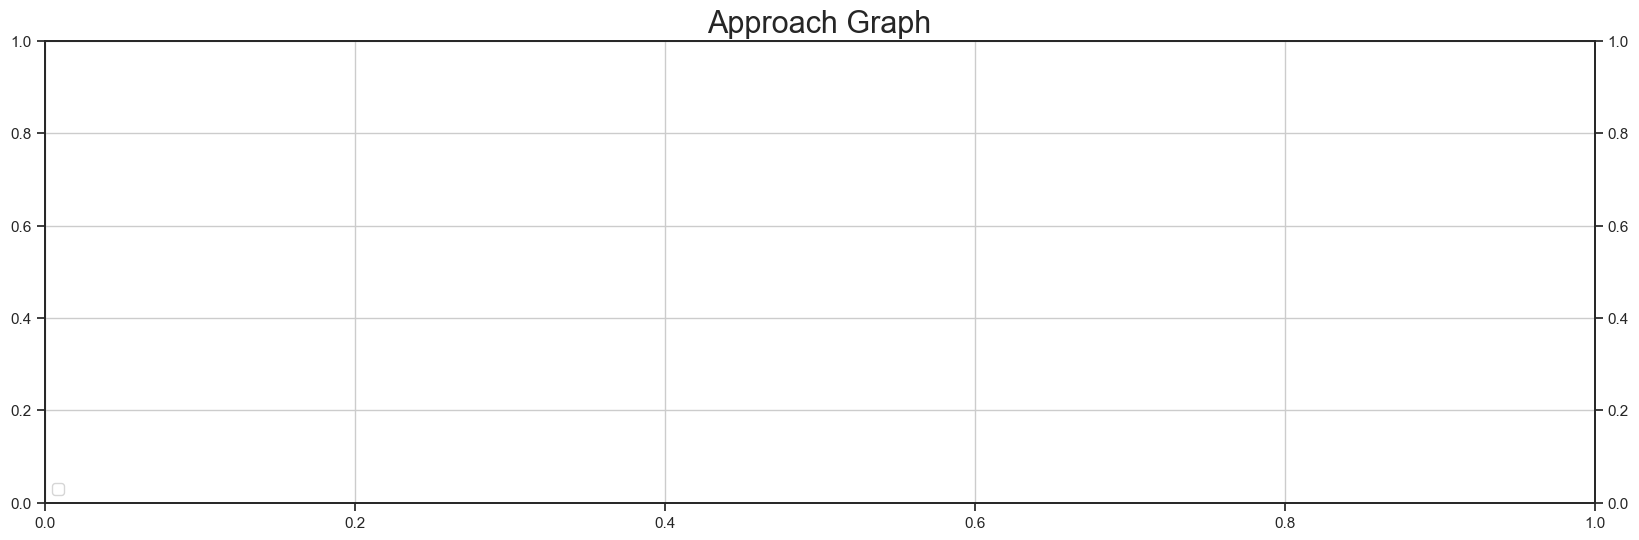

In [9]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 22:50:0")]
df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 23:05:0")]

plotApproachGraph(df_plot)

In [ ]:
df_plot = df_data
df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 22:50:0")]
df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 23:05:0")]

plotApproachGraph(df_plot)

# Meta Data

In [ ]:
df_plot = df_data
g, ax = plt.subplots(figsize=(12, 5))
 

sns.histplot(
    data=df_plot,
    x="SPEED (mph)",
    # bins=12,
    color="#251e6c",
    alpha=0.6,
    # hue="Rail Line",
    # multiple="stack",
    discrete=True,
)

In [ ]:
df_plot

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df_plot, x="EZ", y="SPEED (mph)", space=0, ratio=17)
g.plot_joint(sns.scatterplot,  sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)